# Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [3]:
df = pd.read_csv(r"C:\Users\shivani\Downloads\21. Uber Request Data.csv")

In [4]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [5]:
df.shape

(6745, 6)

In [6]:
df.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
df['Driver id']= df['Driver id'].ffill()

In [8]:
df['Drop timestamp']= df['Drop timestamp'].ffill()

In [9]:
df.isna().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          6745 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     6745 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


# To check Statistical Summary

In [13]:
df.describe()

,Request id,Driver id
count,6745.000000,6745.000000
mean,3384.644922,208.629800
std,1955.099667,99.491771
min,1.000000,1.000000
25%,1691.000000,123.000000
50%,3387.000000,245.000000
75%,5080.000000,300.000000
max,6766.000000,300.000000


In [11]:
df['Request timestamp']= df['Request timestamp'].astype(str).str.replace("/",'-')

In [12]:
df['Drop timestamp']= df['Drop timestamp'].astype(str).str.replace("/",'-')

In [13]:
df[['Request timestamp']]

,Request timestamp
0,11-7-2016 11:51
1,11-7-2016 17:57
2,12-7-2016 9:17
3,12-7-2016 21:08
4,13-07-2016 08:33:16
...,...
6740,15-07-2016 23:49:03
6741,15-07-2016 23:50:05
6742,15-07-2016 23:52:06
6743,15-07-2016 23:54:39


In [14]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-7-2016 11:51,11-7-2016 13:00
1,867,Airport,1.0,Trip Completed,11-7-2016 17:57,11-7-2016 18:47
2,1807,City,1.0,Trip Completed,12-7-2016 9:17,12-7-2016 9:58
3,2532,Airport,1.0,Trip Completed,12-7-2016 21:08,12-7-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,300.0,No Cars Available,15-07-2016 23:49:03,15-07-2016 09:56:07
6741,6752,Airport,300.0,No Cars Available,15-07-2016 23:50:05,15-07-2016 09:56:07
6742,6751,City,300.0,No Cars Available,15-07-2016 23:52:06,15-07-2016 09:56:07
6743,6754,City,300.0,No Cars Available,15-07-2016 23:54:39,15-07-2016 09:56:07


In [15]:
from datetime import datetime

In [16]:
from dateutil import parser

In [17]:
df['Request timestamp'] = df['Request timestamp'].apply(lambda x: parser.parse(x))

In [18]:
df['Request timestamp']= pd.to_datetime(df['Request timestamp'],format='%d-%m-%Y %H:%M:%S')

In [19]:
df['Pickup_Date']= df['Request timestamp'].dt.day

In [20]:
df['Pickup_Month']= df['Request timestamp'].dt.month

In [21]:
df['Pickup_Hour']= df['Request timestamp'].dt.hour

In [22]:
df['Pickup_Minutes']= df['Request timestamp'].dt.minute

In [23]:
df['Drop timestamp']= df['Drop timestamp'].apply(lambda x: parser.parse(x))

In [24]:
df['Drop timestamp']= pd.to_datetime(df['Drop timestamp'],format='%d-%m-%Y %H:%M:%S')

In [25]:
df['Drop_Date']= df['Drop timestamp'].dt.day

In [26]:
df['Drop_Month']= df['Drop timestamp'].dt.month

In [27]:
df['Drop_Hour']= df['Drop timestamp'].dt.hour

In [28]:
df['Drop_Minutes']= df['Drop timestamp'].dt.minute

In [29]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Pickup_Date,Pickup_Month,Pickup_Hour,Pickup_Minutes,Drop_Date,Drop_Month,Drop_Hour,Drop_Minutes
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,7,11,11,51,7,11,13,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,7,11,17,57,7,11,18,47
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,7,12,9,17,7,12,9,58
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,7,12,21,8,7,12,22,3
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,13,7,8,33,13,7,9,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,300.0,No Cars Available,2016-07-15 23:49:03,2016-07-15 09:56:07,15,7,23,49,15,7,9,56
6741,6752,Airport,300.0,No Cars Available,2016-07-15 23:50:05,2016-07-15 09:56:07,15,7,23,50,15,7,9,56
6742,6751,City,300.0,No Cars Available,2016-07-15 23:52:06,2016-07-15 09:56:07,15,7,23,52,15,7,9,56
6743,6754,City,300.0,No Cars Available,2016-07-15 23:54:39,2016-07-15 09:56:07,15,7,23,54,15,7,9,56


In [30]:
df.drop(columns= ['Request timestamp','Drop timestamp','Drop_Date','Drop_Month'],axis=1,inplace=True)

In [31]:
df.rename(columns={"Pickup_Date":'Date',"Pickup_Month":"Month"},inplace=True)

In [32]:
df

,Request id,Pickup point,Driver id,Status,Date,Month,Pickup_Hour,Pickup_Minutes,Drop_Hour,Drop_Minutes
0,619,Airport,1.0,Trip Completed,7,11,11,51,13,0
1,867,Airport,1.0,Trip Completed,7,11,17,57,18,47
2,1807,City,1.0,Trip Completed,7,12,9,17,9,58
3,2532,Airport,1.0,Trip Completed,7,12,21,8,22,3
4,3112,City,1.0,Trip Completed,13,7,8,33,9,25
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,300.0,No Cars Available,15,7,23,49,9,56
6741,6752,Airport,300.0,No Cars Available,15,7,23,50,9,56
6742,6751,City,300.0,No Cars Available,15,7,23,52,9,56
6743,6754,City,300.0,No Cars Available,15,7,23,54,9,56


In [33]:
df['Pickup point'].value_counts()

Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

In [34]:
df['Status'].value_counts()

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

# EDA on data 

In [35]:
df

,Request id,Pickup point,Driver id,Status,Date,Month,Pickup_Hour,Pickup_Minutes,Drop_Hour,Drop_Minutes
0,619,Airport,1.0,Trip Completed,7,11,11,51,13,0
1,867,Airport,1.0,Trip Completed,7,11,17,57,18,47
2,1807,City,1.0,Trip Completed,7,12,9,17,9,58
3,2532,Airport,1.0,Trip Completed,7,12,21,8,22,3
4,3112,City,1.0,Trip Completed,13,7,8,33,9,25
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,300.0,No Cars Available,15,7,23,49,9,56
6741,6752,Airport,300.0,No Cars Available,15,7,23,50,9,56
6742,6751,City,300.0,No Cars Available,15,7,23,52,9,56
6743,6754,City,300.0,No Cars Available,15,7,23,54,9,56


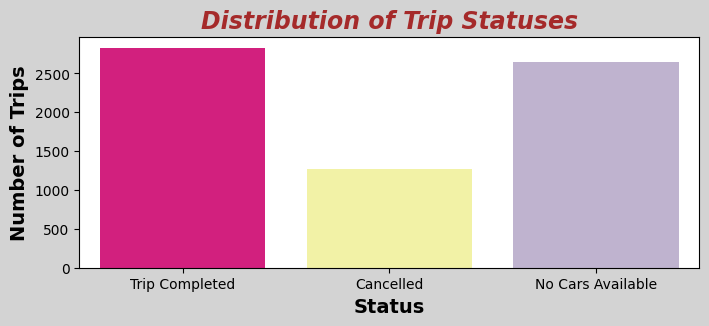

In [36]:
plt.figure(figsize=(8,3))
sns.countplot(x='Status', data=df,palette='Accent_r')
plt.title('Distribution of Trip Statuses',fontsize=17,fontweight='bold',fontstyle='italic',color='brown')
plt.xlabel('Status',fontweight='bold',fontsize=14)
plt.ylabel('Number of Trips',fontweight='bold',fontsize=14)
plt.gcf().set_facecolor('lightgrey')
plt.show()

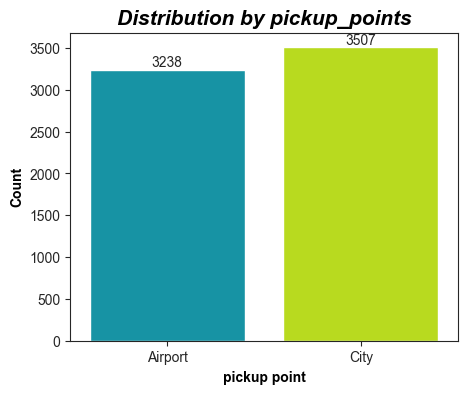

In [37]:
plt.figure(figsize=(5,4))
sns.set_style('ticks')
ax=sns.countplot(x='Pickup point',data=df,palette='nipy_spectral',color='black')

plt.title('Distribution by pickup_points',color='black',fontsize=15,fontweight='bold',fontstyle='italic')
plt.xlabel('pickup point',color='black',fontweight='bold')
plt.ylabel('Count',color='black',fontweight='bold')
#sns.set_context("paper")

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [39]:
df["Pickup point"].value_counts()

Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

In [40]:
df["Month"].value_counts()

Month
7     4071
11    1367
12    1307
Name: count, dtype: int64

In [41]:
df.head()

,Request id,Pickup point,Driver id,Status,Date,Month,Pickup_Hour,Pickup_Minutes,Drop_Hour,Drop_Minutes
0,619,Airport,1.0,Trip Completed,7,11,11,51,13,0
1,867,Airport,1.0,Trip Completed,7,11,17,57,18,47
2,1807,City,1.0,Trip Completed,7,12,9,17,9,58
3,2532,Airport,1.0,Trip Completed,7,12,21,8,22,3
4,3112,City,1.0,Trip Completed,13,7,8,33,9,25


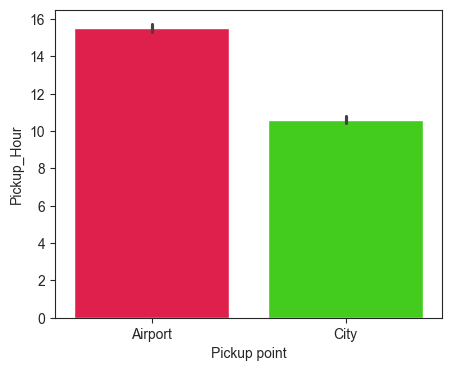

In [42]:
plt.figure(figsize=(5,4))
sns.barplot(x="Pickup point",y="Pickup_Hour",data=df,palette="prism_r")
plt.show()

In [43]:
df.groupby(["Pickup point"]).mean(numeric_only=True)

,Request id,Driver id,Date,Month,Pickup_Hour,Pickup_Minutes,Drop_Hour,Drop_Minutes
Pickup point,,,,,,,,
Airport,3455.450896,227.555899,11.081841,8.872761,15.500000,29.490426,10.567943,45.042928
City,3319.270031,191.155403,11.369547,8.693470,10.608497,29.651839,10.683490,44.857143


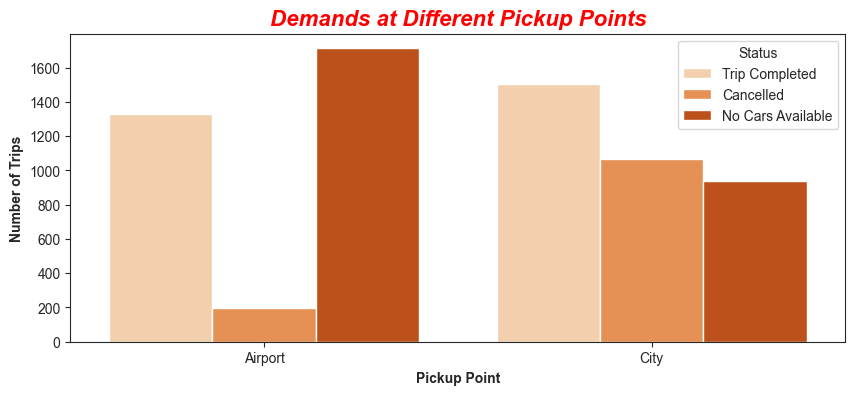

In [44]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Pickup point', hue='Status', data=df,palette='Oranges')
plt.title('Demands at Different Pickup Points',fontweight='bold',fontsize=16,color='red',fontstyle='italic')
plt.xlabel('Pickup Point',fontweight='bold')
plt.ylabel('Number of Trips',fontweight='bold')
plt.show()

In [45]:
def categorize_hour(hour):
    if hour >= 5 and hour <= 11:
        return "Morning"
    elif hour >= 12 and hour <= 16:
        return "Afternoon"
    elif hour >= 17 and hour <= 23:
        return "Evening"
    else:
        return "Night"

In [46]:
df['Pickup_Hour'] = df['Pickup_Hour'].apply(categorize_hour)

In [47]:
df['Drop_Hour'] = df['Drop_Hour'].apply(categorize_hour)

In [48]:
df

,Request id,Pickup point,Driver id,Status,Date,Month,Pickup_Hour,Pickup_Minutes,Drop_Hour,Drop_Minutes
0,619,Airport,1.0,Trip Completed,7,11,Morning,51,Afternoon,0
1,867,Airport,1.0,Trip Completed,7,11,Evening,57,Evening,47
2,1807,City,1.0,Trip Completed,7,12,Morning,17,Morning,58
3,2532,Airport,1.0,Trip Completed,7,12,Evening,8,Evening,3
4,3112,City,1.0,Trip Completed,13,7,Morning,33,Morning,25
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,300.0,No Cars Available,15,7,Evening,49,Morning,56
6741,6752,Airport,300.0,No Cars Available,15,7,Evening,50,Morning,56
6742,6751,City,300.0,No Cars Available,15,7,Evening,52,Morning,56
6743,6754,City,300.0,No Cars Available,15,7,Evening,54,Morning,56


In [49]:
hourly_distribution = df.groupby('Pickup_Hour').size().reset_index(name='Count')

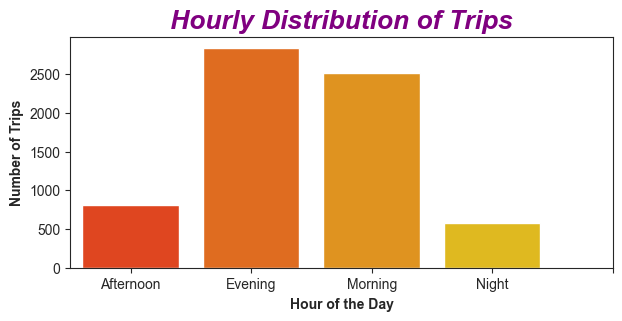

In [50]:
plt.figure(figsize=(7,3))
sns.barplot(x='Pickup_Hour', y='Count', data=hourly_distribution,palette='autumn')
plt.title('Hourly Distribution of Trips',fontweight='bold',fontsize=19,color='purple',fontstyle='italic')
plt.xlabel('Hour of the Day',fontweight='bold')
plt.ylabel('Number of Trips',fontweight='bold')
plt.xticks(range(0, 5))
plt.show()

In [51]:
pickup_hourly_distribution = df.groupby(['Pickup_Hour', 'Pickup point']).size().reset_index(name='Count')

In [52]:
pivot_table = pickup_hourly_distribution.pivot(index='Pickup point', columns='Pickup_Hour', values='Count').fillna(0)

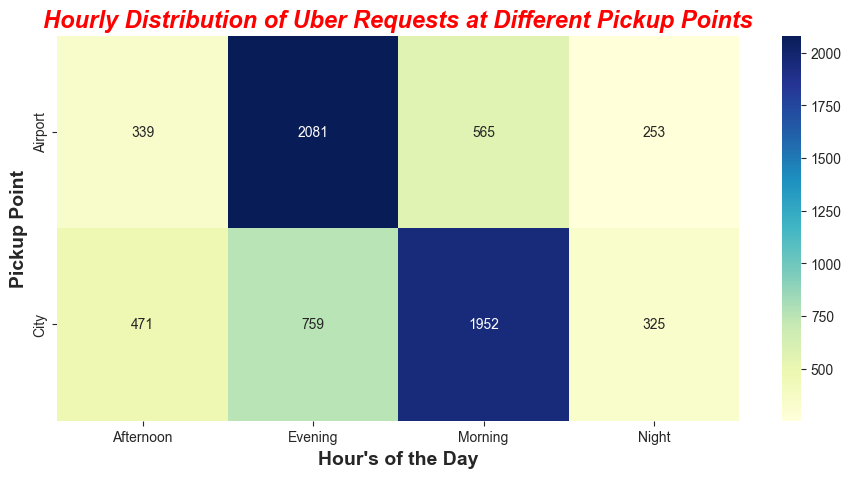

In [53]:
plt.figure(figsize=(11, 5))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Hourly Distribution of Uber Requests at Different Pickup Points',fontweight='bold',color='red',fontsize=17,fontstyle='italic')
plt.xlabel("Hour's of the Day",fontweight='bold',fontsize=14)
plt.ylabel('Pickup Point',fontweight='bold',fontsize=14)
plt.show()

# Conclusion

1. Hourly Distribution: The heatmap likely reveals which hours of the day (categorized as Morning, Afternoon, Evening, and Night) have the highest and lowest number of Uber requests at different pickup points (Airport or City).

2. Peak Hours: If the heatmap shows darker colors (indicating higher counts) during specific times at certain pickup points, those are the peak hours. For example, there might be more requests from the Airport in the Morning, while City requests might peak in the Morning.

# Recommendations:

Morning and Evening Peaks: Allocate more drivers to the Airport during Evening to meet the higher demand.

City Peak: If the City shows a significant increase in requests during the Morning, ensure adequate driver availability in those areas during those times.

Driver Scheduling: Adjust driver schedules to align with peak demand times, ensuring that more drivers 
                   are available during periods of high demand.